<img src="./img/Logo.jpg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 5

### Juan Manuel Ronchetti
### Javier Santelys

## Dada la siguiente plantilla:
<img src="./img/Plant.png" /> 

### Se pide:
* $\omega_0 = 2 \pi 22 kHz$
* $Q = 5$
* Aproximación Chebyshev con ripple de 0,5 dB
* $|T(s)| = -16dB$ para $f_{s1} = 17 kHz$
* $|T(s)| = -24dB$ para $f_{s2} = 36 kHz$

1)  Obtener la plantilla de diseño pasabanda normalizada

2)  Obtener la función transferencia normalizada del prototipo pasabajo que satisfaga el requerimiento del filtro pasabanda.

3)  Obtener la transferencia pasabanda normalizada

4)  Implementar mediante secciones pasivas separadas por seguidores de tensión activos.

5)  Activar las redes pasivas mediante la red propuesta aquí debajo y comprobar mediante simulación el comportamiento deseado.
<img src="./img/RedPropuesta.png" width=600 /> 

## Introduccion: Procedimiento

El siguiente trabajo consiste en obtener un circuito pasabanda que cumpla con la plantilla especificada.

Para ello, primero se normalizan los valores de las frecuencias de corte y de stop respecto de la $f_0$. A partir de ello, se obtienen las frecuencias de stop del pasabajos prototipo. Al pedir dos requerimientos de atenuacion distintos para las frecuencias de stop, y considerando que la transformacion pasabajos a pasabanda siempre produce transferencias simetricas, se obtiene el orden del pasabajos considerando la frecuencia de stop mas exigente de las dos obtenidas.

Una vez obtenido el pasabajos prototipo, se aplica el nucleo de transformacion pasabanda (normalizado respecto a $w_0$):
\begin{equation} $ = Q(s + \frac{1}{s}) \end{equation}
Una vez desarrollada el algebra y obtenida la transferencia, se separa la misma en secciones de segundo orden, para mayor facilidad a la hora de implementar circuitalmente.

Finalmente, se obtienen los valores de los componentes para todas las secciones, y se obtiene el circuito final.

## Desarrollo

A continuacion se muestra el desarrollo en papel de la obtencion de la plantilla pasabanda, el prototipo pasabajos, y finalmente el objetivo pasabanda:

In [1]:
from IPython.display import IFrame
IFrame("./img/TS5_1y2.pdf", width=900, height=1700)

Como se observa en el desarrollo en papel, se obtuvo un filtro chebyshev de orden 3.

La transferencia del pasabanda resulta:
\begin{equation} T(s) = \frac{s 1.23 \frac{1}{7.79}}{s^2 + s \frac{1}{7.79} + 1} \cdot \frac{s 2.05 \frac{1.1}{16.5}}{s^2 + s \frac{1.1}{16.5} + 1.1^2} \cdot \frac{s 4.8 \frac{0.9}{16.5}}{s^2 + s \frac{0.9}{16.5} + 0.9^2} \end{equation}

Que corresponde a la parametrizacion:
\begin{equation} T(s) = \frac{s k_1 \frac{1}{Q}}{s^2 + s \frac{1}{Q} + 1} \cdot \frac{s k_2 \frac{w_{01}}{q}}{s^2 + s \frac{w_{01}}{q} + w_{01}^2} \cdot \frac{s k_3 \frac{w_{02}}{q}}{s^2 + s \frac{w_{02}}{q} + w_{02}^2} \end{equation}

De la parametrizacion podemos extraer y verificar los siguientes valores:

#### SOS 1:
* $w_0 = 1$
* $Q = 7.79$
* $k_1 = 1.23$

#### SOS 2:
* $w_{01} = 1.1$
* $q = 16.5$
* $k_1 = 2.05$

#### SOS 3:
* $w_{02} = 0.9$
* $q = 16.5$
* $k_1 = 4.8$

Para corroborar los valores obtenidos, a continuacion se detalla la verificacion numerica en python:

### Simulacion númerica

#### Transferencia sin factorizar

<IPython.core.display.Math object>

#### Factorizado en SOS y parametrizado

<IPython.core.display.Math object>

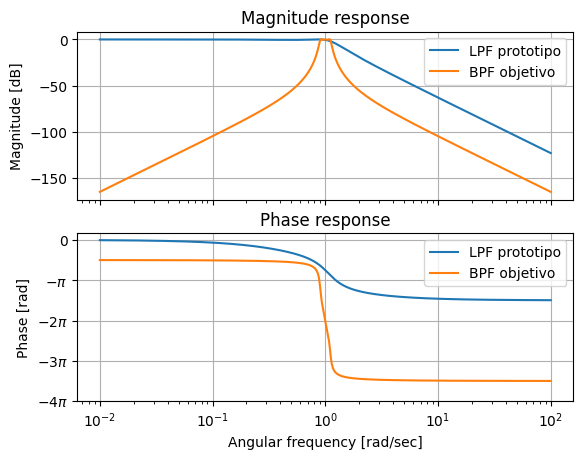

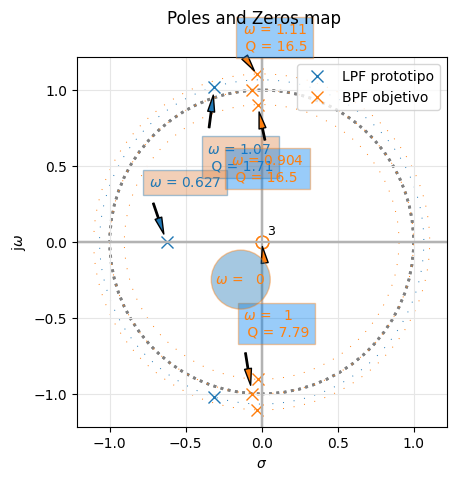

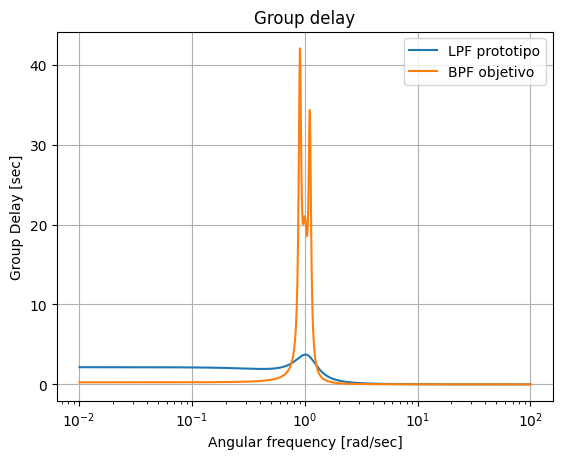

In [2]:
import sympy as sp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from pytc2.sistemas_lineales import analyze_sys, tf2sos_analog, pretty_print_SOS, pretty_print_lti
from pytc2.general import print_subtitle

plt.close('all')

# Pasabajos
num= [0.714]
den= [1, 1.25, 1.53, 0.714]
tf_lp = sig.TransferFunction(num, den)
analyze_sys( tf_lp, 'LPF prototipo' )

# Pasabanda
num_bp= [5.7e-3, 0, 0, 0]
den_bp= [1, 0.25, 3.06, 0.5057, 3.06, 0.25, 1]
tf_bp = sig.TransferFunction(num_bp, den_bp)
analyze_sys( tf_bp, 'BPF objetivo' )

print_subtitle('Transferencia sin factorizar')
pretty_print_lti(num_bp, den_bp)

bp_SOS = tf2sos_analog(num_bp, den_bp)

print_subtitle('Factorizado en SOS y parametrizado')
pretty_print_SOS(bp_SOS, mode='omegayq')

A partir de la simulacion numerica, se observa que la transferencia obtenida cumple con la plantilla especificada. El paso siguiente será la implementacion circuital.

## Implementacion con estructuras pasivas

Para la implementacion se emplearon circuitos RLC con resistencia en serie y capacitor e inductor en paralelo para cada seccion.
Se definió $C_n = 1$, adoptando una $\Omega_z = 1k\Omega$ y $\Omega_0 = 2\pi 22kHz$. Para las ganancias de cada seccion, se utilizaron opamps en configuracion no inversor, los cuales ademas de aportar ganancia cumplen el rol de separar las secciones.

<img src="./img/Implementacion.png"  width=650 />

Se observa que se obtuvieron los siguientes valores de los componentes:

#### SOS 1:
* $C = 1$
* $L = 1$
* $R = 7.79$

#### SOS 2:
* $C = 1$
* $L = 0.83$
* $R = 15$

#### SOS 3:
* $C = 1$
* $L = 1.23$
* $R = 18.18$

El circuito construido resulta entonces:
<img src="./img/Circuito_P_Norm.png"  width=650 /> 

### Simulacion circuital normalizada
A continuacion se observan los resultados de la simulacion circuital:
<img src="./img/Resp_P_Norm.png"  width=650 /> 
<img src="./img/Resp_P_Norm_2.png"  width=650 /> 

#### Observaciones:
* Se observa una $f_0$ de $159mHz$, la cual corresponde a $1\frac{rad}{s}$ correctamente. 
* Se observan frecuencias de corte inferior y superior de $144mHz$ y $175mHz$, las cuales corresponden a $0.9\frac{rad}{s}$ y $1.1\frac{rad}{s}$ respectivamente, como era esperado.
* Se observa que la forma de la transferencia se haya deformada respecto a la esperada en un filtro Chebyshev, presentando una ganancia de $400mdB$ en la banda de paso, lo cual no era lo esperado.

#### Corroboracion de las SOS:
A fin de determinar el motivo por el cual la transferencia se haya deformada, se simularon individualmente cada seccion y se buscó corroborar que los valores de $w_0$ y $Q$ fueran los calculados. 

Para hallar el valor de $Q$ de cada seccion se tuvo en cuenta que $Q = \frac{w_0}{BW}$.

##### SOS 1:
<img src="./img/Q1.png"  width=650 /> 

* $w_0 = 1$ verifica
* Q calculado: 7.79
* Q obtenido : 7.74

##### SOS 2:
<img src="./img/Q2.png"  width=650 /> 

* $w_0 = 1.1$ verifica
* Q calculado: 16.5
* Q obtenido : 16.25

##### SOS 3:
<img src="./img/Q3.png"  width=650 /> 

* $w_0 = 0.9$ verifica
* Q calculado: 16.5
* Q obtenido : 16

Como se puede observar, la deformacion de la transferencia se debe a que no se obtuvieron los valores de Q calculados una vez realizada la implementacion circuital. 

#### Correcciones:

Luego de obtener los resultados anteriores, se analizó donde podia estar el problema que causara que el Q no diera lo esperado. De alli surgieron dos conclusiones:
* Existe un componente resistivo parasito en los componentes de LTSpice, el cual altera ligeramente los resultados por sobre lo esperado.
* Se deben computar todos los digitos posibles en los valores de los componentes, sin aproximaciones ni redondeos.

Teniendo esto en cuenta, se realizaron nuevamente los calculos teniendo en cuenta la transferencia obtenida en python:

<img src="./img/Trans.png"/> 

A su vez se asignó manualmente un valor de resistencia serie de 0 a los capacitores e inductores.

El circuito final resulto entonces:

<img src="./img/CircuitoFinal.png"  /> 

En el cual se midieron los siguientes resultados:

<img src="./img/Final1.png"  width=650 /> 
<img src="./img/Final2.png"  width=650 /> 

Se observa que finalmente se obtuvo una transferencia simétrica, donde la $w_0$ y las frecuencias de corte corresponden a los valores calculados.

#### Conclusiones

Se concluye entonces que el diseño fue exitoso. 
* Se pudo obtener un pasabanda que cumpliera con la plantilla y los requerimientos pedidos, que presenta una transferencia con un riple respecto a lo esperado para un Chebyshev.
* Se observa un sobrepico de 0.3dB previo a la frecuencia de corte, lo cual se le atribuye al valor elevado de Q que presentan las secciones 2 y 3 (16.53).
* Se observa una sensibilidad enorme de la transferencia respecto al valor de los componentes. Si este circuito fuera a ser implementado en la practica, seria muy dificil obtener la transferencia deseada debido a la dispersión de los componentes y su influencia en la respuesta.

## Implementacion con red activada

En esta seccion se busco realizar la implementacion de la transferencia mediante la siguiente red activa propuesta en el libro de Schaumann (figura 5.16):
<img src="./img/Red_Schaumann.png" width=600 />

La transferencia de esta red es la siguiente:
\begin{equation} T(s) = \frac{s^2 (2a-c) + s(w_0/Q)(2b-c) + cw_0^2 )}{s^2 + s w_0/Q + w_0^2} \end{equation}

Al desear implementar un pasabanda, se designan $a = c = 0$, y se tiene:
\begin{equation} T(s) = \frac{s(w_0/Q)(2b) }{s^2 + s w_0/Q + w_0^2} \end{equation}

Lo cual resulta en el circuito propuesto (donde $a$ corresponde al $b$ indicado en el Schaumann):
<img src="./img/RedPropuesta.png" width=600 />

Se observa que se tiene un GIC en configuracion girador en reemplazo del inductor, y se utiliza la tecnica de levantamiento parcial de masas para fijar la ganancia del pasabanda: $2a = k$

La impedancia de entrada del GIC es: $Z_i = \frac{Z_1 Z_3 Z_5}{Z_2 Z_4}$

Teniendo en cuenta estas modificaciones, se implementaron las secciones de segundo orden calculadas previamente:

##### SOS 1:
* $k = 1.23 \Rightarrow a = 1.232/2 = 0.616$
* $L = 1 \Rightarrow R_1 = C_2 = R_3 = R_4 = R_5 = 1$

##### Al poseer tanto la SOS 2 como la SOS 3 ganancias mayores a 2, se implementa una $a = 0.5$ para tener una $k = 1$ y luego obtener la ganancia con no inversores de la misma manera que antes.

##### SOS 2:
* $k = 2.054 \Rightarrow a = 0.5$
* $L = 0.8175 \Rightarrow R_1 = 0.8175$
* $C_2 = R_3 = R_4 = R_5 = 1$

##### SOS 3:
* $k = 4.797 \Rightarrow a = 0.5$
* $L = 1.223 \Rightarrow R_1 = 1.223$
* $C_2 = R_3 = R_4 = R_5 = 1$

Finalmente, el circuito resultante es el siguiente:

<img src="./img/Circuito_Activado.png" />

Y los resultados son los siguientes:

<img src="./img/Activado_1.png" width=600 />

<img src="./img/Activado_2.png" width=600 />

#### Conclusiones

Se observa que se logró obtener exitosamente la misma transferencia que con el inductor, con la misma forma, $w_0$, y las mismas frecuencias de corte. 

## Modalidad de trabajo conjunto

Este trabajo fue realizado en colaboracion por Juan Ronchetti y Javier Santelys. 

Ambos analizamos el circuito por separado, y realizamos las simulaciones por nuestra cuenta, para finalmente comparar nuestros resultados y sacar conclusiones en conjunto.